In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# IMDb URL pattern for genres with pagination
BASE_URL = 'https://www.imdb.com/search/title/?title_type=feature&genres=adventure&start={start}&ref_=adv_nxt'
MOVIES_PER_PAGE = 50
TOTAL_MOVIES = 500

# Headers to mimic a browser visit
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Initialize data storage
data = []

# Loop for pagination (increments of 50)
for start in range(1, TOTAL_MOVIES + 1, MOVIES_PER_PAGE):
    url = BASE_URL.format(start=start)
    print(f"Scraping: {url}")

    try:
        # Request and parse page
        response = requests.get(url, headers=HEADERS)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find movie containers
        movies = soup.find_all('div', class_='lister-item mode-advanced')

        for movie in movies:
            # Title
            title = movie.h3.a.text if movie.h3.a else 'N/A'
            # Year (use regex to clean up text)
            year = movie.h3.find('span', class_='lister-item-year').text if movie.h3.find('span', class_='lister-item-year') else 'N/A'
            year = year.replace('(', '').replace(')', '').replace('I', '').strip()
            # Rating
            rating = movie.find('div', class_='inline-block ratings-imdb-rating')
            rating = rating.strong.text if rating and rating.strong else 'N/A'
            
            data.append({
                'Title': title,
                'Year': year,
                'Rating': rating
            })

        print(f"✅ Successfully scraped {len(movies)} movies from page {start}")

    except Exception as e:
        print(f"❌ Error scraping page {start}: {e}")

    # Wait between requests to avoid rate-limiting
    time.sleep(2)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('imdb_adventure.csv', index=False)

print("\n✅ Scraping Complete! Data saved to 'imdb_adventure.csv'")
print(df.head(10))


Scraping: https://www.imdb.com/search/title/?title_type=feature&genres=adventure&start=1&ref_=adv_nxt
✅ Successfully scraped 0 movies from page 1
Scraping: https://www.imdb.com/search/title/?title_type=feature&genres=adventure&start=51&ref_=adv_nxt
✅ Successfully scraped 0 movies from page 51
Scraping: https://www.imdb.com/search/title/?title_type=feature&genres=adventure&start=101&ref_=adv_nxt
✅ Successfully scraped 0 movies from page 101
Scraping: https://www.imdb.com/search/title/?title_type=feature&genres=adventure&start=151&ref_=adv_nxt
✅ Successfully scraped 0 movies from page 151
Scraping: https://www.imdb.com/search/title/?title_type=feature&genres=adventure&start=201&ref_=adv_nxt
✅ Successfully scraped 0 movies from page 201
Scraping: https://www.imdb.com/search/title/?title_type=feature&genres=adventure&start=251&ref_=adv_nxt
✅ Successfully scraped 0 movies from page 251
Scraping: https://www.imdb.com/search/title/?title_type=feature&genres=adventure&start=301&ref_=adv_nxt
✅ 

In [16]:
pip install XlsxWriter

Note: you may need to restart the kernel to use updated packages.


In [4]:
import re
import pandas as pd
temp = 0

with open("title.basics.tsv", 'r', encoding="utf-8") as myfile:  
    with open("title.basics_.csv", 'w', encoding="utf-8") as csv_file:
        for line in myfile:
            if temp > 0:
            # Replace every tab with a comma
                fileContent = re.sub("\t", ",", line)
                csv_file.write(fileContent)  # Write to CSV
            temp+=1


In [6]:
column_names = ["tconst", "titleType", "primaryTitle", "originalTitle", "isAdult", "startYear(YYYY)", "endYear(YYYY)", "runtimeMinutes", "genres"]

In [8]:
df = pd.read_csv("title.basics.tsv", sep="\t", names=column_names, na_values="\\N", encoding="utf-8", on_bad_lines="skip", skiprows=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_60400\3631777478.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("title.basics.tsv", sep="\t", names=column_names, na_values="\\N", encoding="utf-8", on_bad_lines="skip", skiprows=1)


In [9]:
# df = pd.read_csv("title.basics_.csv", names=column_names, encoding="utf-8", on_bad_lines="skip", header=None, quotechar='"')

In [10]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear(YYYY),endYear(YYYY),runtimeMinutes,genres
0,tt31080448,tvEpisode,Slippery Messy,Slippery Messy,0,2023.0,NaN,NaN,"Animation,Comedy,Family"
1,tt31080449,tvSeries,Moshaver,Moshaver,0,2024.0,2024.0,NaN,NaN
2,tt31080450,tvEpisode,I Ordered the Highest Calorie Option for 24 Hours,I Ordered the Highest Calorie Option for 24 Hours,0,2019.0,NaN,NaN,Documentary
3,tt31080451,tvEpisode,How I Feel About Vinyl Siding,How I Feel About Vinyl Siding,0,2024.0,NaN,NaN,Reality-TV
4,tt31080452,tvEpisode,I Tested Kitchen Organization Hacks & Cleaning...,I Tested Kitchen Organization Hacks & Cleaning...,0,2019.0,NaN,NaN,Documentary


In [11]:
df.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear(YYYY)', 'endYear(YYYY)', 'runtimeMinutes', 'genres'],
      dtype='object')

In [12]:
df.shape

(1529695, 9)

In [13]:
data = pd.read_csv("output.csv")

In [14]:
data.shape

(1547472, 3)

In [15]:
data.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2142
1,tt0000002,5.5,290
2,tt0000003,6.4,2179
3,tt0000004,5.3,186
4,tt0000005,6.2,2914


In [16]:
df_movies = df[df["titleType"] == "movie"]


In [17]:
print(df_movies.shape)  # Check how many rows are left
df_movies.head()

(80108, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear(YYYY),endYear(YYYY),runtimeMinutes,genres
5,tt31080453,movie,Uzun Yol Ahiska,Uzun Yol Ahiska,0,2016.0,NaN,NaN,Comedy
15,tt31080465,movie,"Militainment, Inc.: Militarism & Pop Culture","Militainment, Inc.: Militarism & Pop Culture",0,2007.0,NaN,124.0,Documentary
48,tt31080501,movie,Taigan jôju,Taigan jôju,0,1959.0,NaN,NaN,NaN
53,tt31080509,movie,The New Economics 101: True Wealth in the New ...,The New Economics 101: True Wealth in the New ...,0,2013.0,NaN,46.0,Documentary
76,tt31080534,movie,The Next American Revolution: Beyond Corporate...,The Next American Revolution: Beyond Corporate...,0,2013.0,NaN,47.0,Documentary


In [18]:
df_movies.drop(["primaryTitle", "isAdult", "endYear(YYYY)", "runtimeMinutes"], axis=1, inplace=True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_60400\1642659619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies.drop(["primaryTitle", "isAdult", "endYear(YYYY)", "runtimeMinutes"], axis=1, inplace=True)


In [19]:
df_movies.head()

,tconst,titleType,originalTitle,startYear(YYYY),genres
5,tt31080453,movie,Uzun Yol Ahiska,2016.0,Comedy
15,tt31080465,movie,"Militainment, Inc.: Militarism & Pop Culture",2007.0,Documentary
48,tt31080501,movie,Taigan jôju,1959.0,NaN
53,tt31080509,movie,The New Economics 101: True Wealth in the New ...,2013.0,Documentary
76,tt31080534,movie,The Next American Revolution: Beyond Corporate...,2013.0,Documentary


In [20]:
data.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2142
1,tt0000002,5.5,290
2,tt0000003,6.4,2179
3,tt0000004,5.3,186
4,tt0000005,6.2,2914


In [23]:
df_movies.columns

Index(['tconst', 'titleType', 'originalTitle', 'startYear(YYYY)', 'genres'], dtype='object')

In [27]:
data.columns = data.columns.str.strip()

In [28]:
data.columns

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')

In [29]:
merged_df = df_movies.merge(data, on='tconst')

In [30]:
merged_df.head()

,tconst,titleType,originalTitle,startYear(YYYY),genres,averageRating,numVotes
0,tt31080737,movie,Bad River,2024.0,Documentary,8.0,66
1,tt31080995,movie,El Bolero de Rubén,2024.0,NaN,6.6,52
2,tt3108154,movie,The Hunt,2016.0,"Action,Drama,Thriller",3.6,71
3,tt3108158,movie,Kawaki.,2014.0,"Drama,Mystery,Thriller",6.5,6165
4,tt3108170,movie,Ai no uzu,2014.0,"Drama,Romance",6.3,521


In [34]:
merged_df.shape

(21163, 7)

In [39]:
merged_df.isnull().sum()

tconst               0
titleType            0
originalTitle        0
startYear(YYYY)      0
genres             428
averageRating        0
numVotes             0
dtype: int64

In [53]:
merged_df = merged_df.dropna(subset=['genres'])

In [55]:
merged_df.shape

(20735, 7)

In [47]:
reviews = pd.read_csv("IMDB Dataset.csv")

In [51]:
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [57]:
reviews.shape

(50000, 2)

In [61]:
reviews_df = reviews.sample(n=20735, random_state=42)

In [63]:
reviews_df.shape

(20735, 2)

In [67]:
pip install rapidfuzz

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [98]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# import pandas as pd

# # Convert to lowercase for better matching
# merged_df['originalTitle'] = merged_df['originalTitle'].str.lower()
# reviews['review'] = reviews['review'].str.lower()

# # TF-IDF Vectorization
# vectorizer = TfidfVectorizer(stop_words='english')
# tfidf_matrix_titles = vectorizer.fit_transform(merged_df['originalTitle'])
# tfidf_matrix_reviews = vectorizer.transform(reviews['review'])

# # Compute cosine similarity
# cosine_sim = cosine_similarity(tfidf_matrix_titles, tfidf_matrix_reviews)

# # Get the best matching review index for each title
# best_match_idx = cosine_sim.argmax(axis=1)

# # Map reviews based on the best match
# merged_df['matched_review'] = [reviews.iloc[idx]['review'] for idx in best_match_idx]
# merged_df['sentiment'] = [reviews.iloc[idx]['sentiment'] for idx in best_match_idx]

# # Drop unnecessary columns and finalize
# final_df = merged_df.drop(columns=['matched_review'])

# # Display the first few rows
# print(final_df.head())



In [79]:
final_df.shape

(20735, 8)

In [90]:
!pip install spacy
!python -m spacy download en_core_web_sm


   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.8 MB 3.4 MB/s eta 0:00:04
   - -------------------------------------- 0.5/11.8 MB 3.4 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.8 MB 2.2 MB/s eta 0:00:05
   -------- ------------------------------- 2.6/11.8 MB 3.4 MB/s eta 0:00:03
   ------------- -------------------------- 3.9/11.8 MB 4.1 MB/s eta 0:00:02
   ------------------ --------------------- 5.5/11.8 MB 4.6 MB/s eta 0:00:02
   ------------------------ --------------- 7.1/11.8 MB 5.1 MB/s eta 0:00:01
   ----------------------------- ---------- 8.7/11.8 MB 5.5 MB/s eta 0:00:01
   ---------------------------------- ----- 10.2/11.8 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 11.8/11.8 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/632.6 kB ? eta -:--:--
   ---------------------------------------- 632.6/632.6 kB 7.9 MB/s eta 0:00:00
   ----

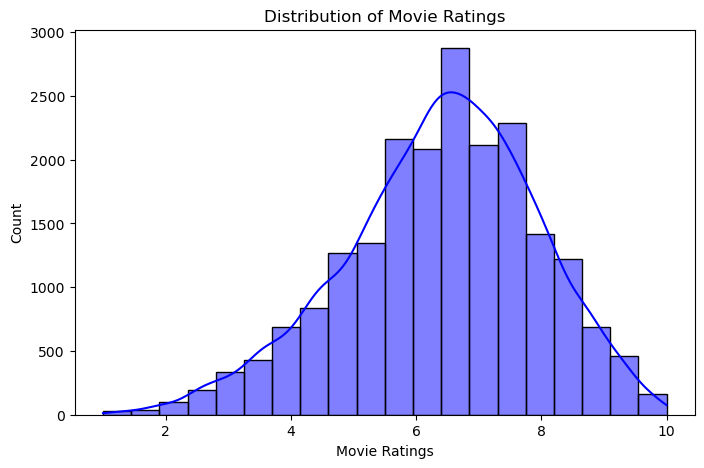

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(merged_df["averageRating"], bins=20, kde=True, color="blue")
plt.xlabel("Movie Ratings")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()


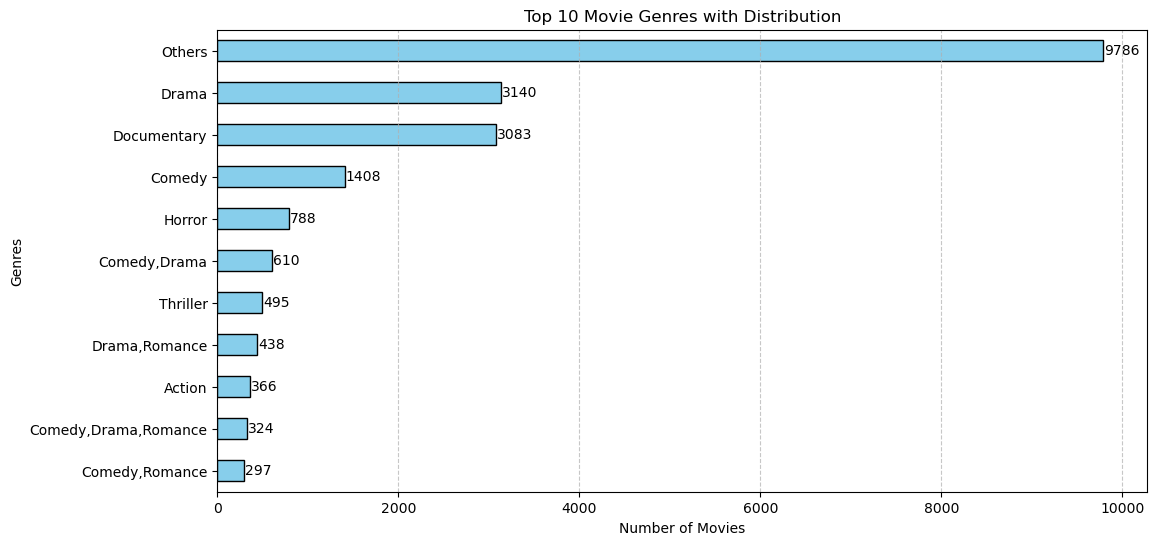

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample genre distribution (Replace with your dataset)
genre_counts = merged_df['genres'].value_counts()

# Show only the top 10 genres, group the rest as 'Others'
top_n = 10
top_genres = genre_counts.nlargest(top_n)
others_count = genre_counts.iloc[top_n:].sum()
top_genres['Others'] = others_count

# Plot a horizontal bar chart
plt.figure(figsize=(12, 6))
top_genres.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels
plt.xlabel("Number of Movies")
plt.ylabel("Genres")
plt.title("Top 10 Movie Genres with Distribution")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show values on bars
for index, value in enumerate(top_genres.sort_values()):
    plt.text(value + 10, index, str(value), va='center', fontsize=10)

plt.show()


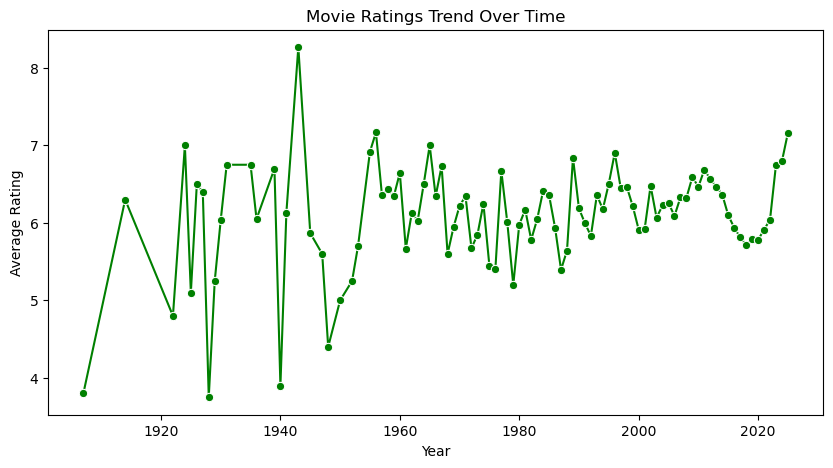

In [104]:
ratings_trend = merged_df.groupby("startYear(YYYY)")["averageRating"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=ratings_trend.index, y=ratings_trend.values, marker="o", color="green")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Movie Ratings Trend Over Time")
plt.show()


C:\Users\saksh\AppData\Local\Temp\ipykernel_60400\3667200697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=reviews_df, palette="coolwarm")


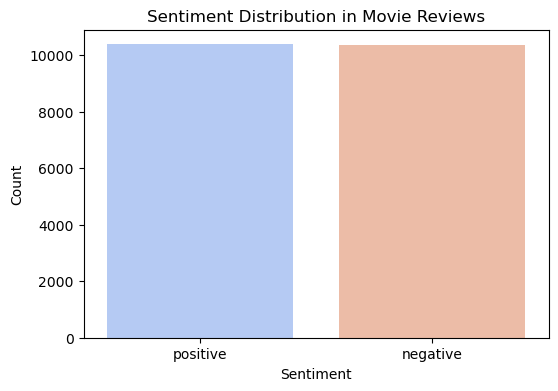

In [106]:
plt.figure(figsize=(6, 4))
sns.countplot(x="sentiment", data=reviews_df, palette="coolwarm")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution in Movie Reviews")
plt.show()


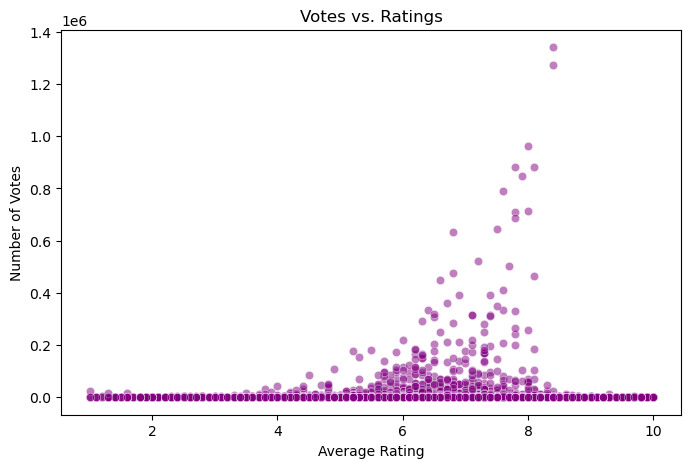

In [120]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="averageRating", y="numVotes", data=merged_df, alpha=0.5, color="purple")
plt.xlabel("Average Rating")
plt.ylabel("Number of Votes")
plt.title("Votes vs. Ratings")
plt.show()


C:\Users\saksh\AppData\Local\Temp\ipykernel_60400\3901063812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment", y="averageRating", data=merged_df, palette="pastel")


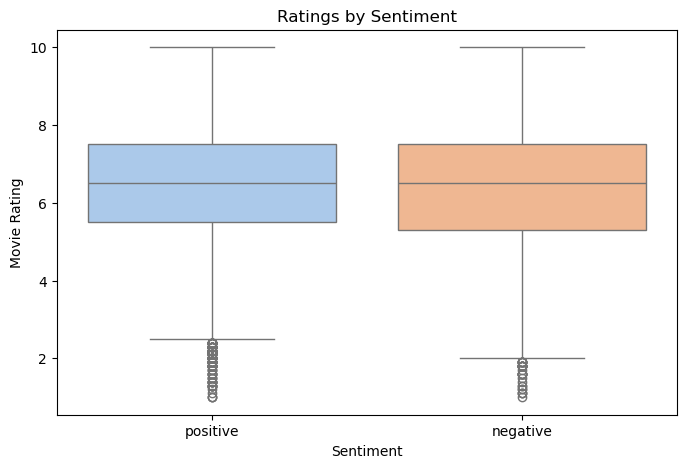

In [122]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="sentiment", y="averageRating", data=merged_df, palette="pastel")
plt.xlabel("Sentiment")
plt.ylabel("Movie Rating")
plt.title("Ratings by Sentiment")
plt.show()


In [126]:
!pip install wordcloud


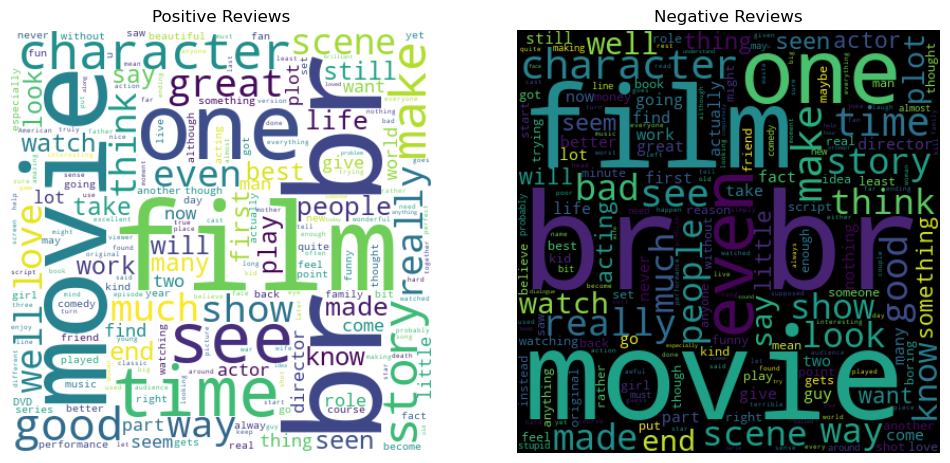

In [127]:
from wordcloud import WordCloud

positive_reviews = " ".join(reviews_df[reviews_df["sentiment"] == "positive"]["review"])
negative_reviews = " ".join(reviews_df[reviews_df["sentiment"] == "negative"]["review"])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

wordcloud_positive = WordCloud(width=400, height=400, background_color="white").generate(positive_reviews)
wordcloud_negative = WordCloud(width=400, height=400, background_color="black").generate(negative_reviews)

axes[0].imshow(wordcloud_positive, interpolation="bilinear")
axes[0].set_title("Positive Reviews")
axes[0].axis("off")

axes[1].imshow(wordcloud_negative, interpolation="bilinear")
axes[1].set_title("Negative Reviews")
axes[1].axis("off")

plt.show()


In [132]:
merged_df.to_csv("movies_data.csv", index=False)
reviews_df.to_csv("reviews_data.csv", index=False)